## Introduction

I am pleased to introduce to you my **first** data processing using basic machine learning methods.

Our task is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## Data gathering

In [340]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data clean

Displaying columns that have any *null-values* and their count.

In [47]:
df.isna().agg(sum).apply(lambda x: x if x > 0 else None).dropna()

Age         177.0
Cabin       687.0
Embarked      2.0
dtype: float64

We can see that three columns have non-value values and one of them exactly **"Cabin"** has a significant number of them, therefore I decide to delete it.

In [341]:
df = df.drop(['Cabin'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

As we can see, the **"Cabin"** column has disappeared.

Let's also remove two rows from the **"Embraked"** column

In [342]:
df = df.dropna(subset=['Embarked'])
df['Embarked'].isnull().agg(sum)

0

Let's get more information from our columns.
Look for **unique items** for each column.

In [139]:
df.apply(lambda x: (len(x.unique()),x.unique())).T.rename(columns={0:"unique", 1:"elements"})

,unique,elements
PassengerId,889,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Survived,2,"[0, 1]"
Pclass,3,"[3, 1, 2]"
Name,889,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
Sex,2,"[male, female]"
Age,89,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
SibSp,7,"[1, 0, 3, 4, 2, 5, 8]"
Parch,7,"[0, 1, 2, 5, 3, 4, 6]"
Ticket,680,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
Fare,247,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


Now, I can collect some information such as:
The **"Pclass"** column has the values 1, 2, 3
**"Embarked"** column similar to "S", "C", "Q"
I will drop the **"Name"** and **"Ticket"** columns because they contain a lot of information that I won't use.

In [343]:
df = df.drop(['Ticket', 'Name'], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

## Exploring

In [143]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As we can see from the **"Age"** column, the oldest person is *80* years old, the youngest is less than a year.
Max number of siblings / spouses is *8*.
Max number of parents / children is *6*.
The highest fare is *512* and the lowest is *0*.

Let us now turn our attention to the degree of survivor due to the Sex division.

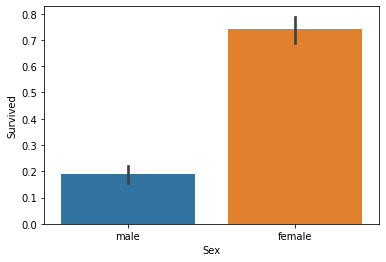

In [158]:
import seaborn as sns

_ = sns.barplot(x='Sex', y='Survived', data=df)

Women had a much better chance of survival(*74%*) than men(*18%*).

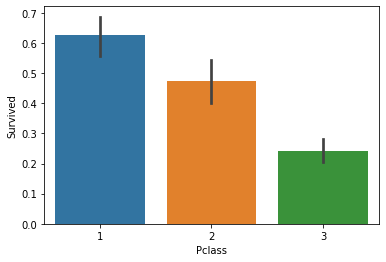

In [274]:
_ = sns.barplot(x='Pclass', y='Survived', data=df)

Passengers from **first** class are *more than twice* as likely to survive than passengers from **third** class

## Correlation

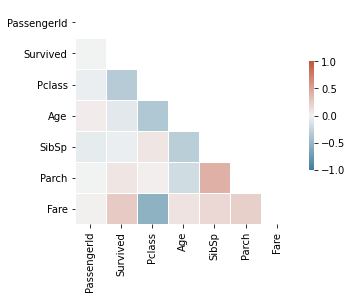

In [300]:
import numpy as np

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Strongly correlated columns add *no value* and can spoil our interpretations.

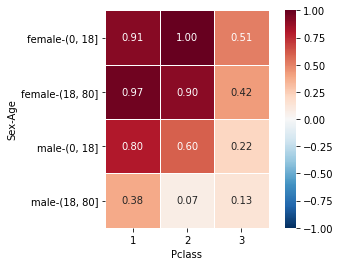

In [453]:
sex_age = pd.pivot_table(df, 'Survived', ['Sex', sets], 'Pclass')
_ = sns.heatmap(sex_age, cmap="RdBu_r", vmax=1, vmin=-1, annot=True,
                              square=True, linewidths=.5, fmt='.2f')

From the correlation above, we can conclude that **women** from the *first* and *second* categories had a chance of surviving almost **90%**
With **men**, the group under the age of *18* with the first category retained the **best chance** of survival.
On the other hand, the group of 
**adult men** did the worst, as did many in the *third category*.

I convert embarked string values to numbers for use in a chart.

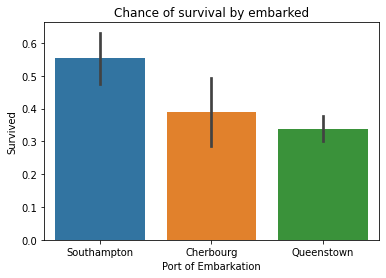

In [721]:
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
g = sns.barplot(x=df['Embarked'], y=df['Survived'])
g.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])
g.set_title('Chance of survival by embarked')
_ = g.set_xlabel('Port of Embarkation')

Statistically, above **50%** of the people who embarked from **Southampton** survived.

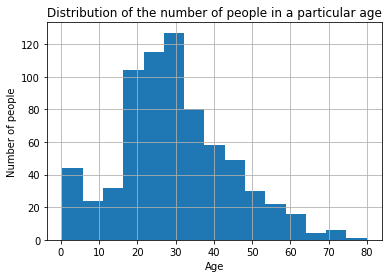

In [726]:
hist = df['Age'].hist(bins=15)
hist.set_title('Distribution of the number of people in a particular age')
hist.set_xlabel('Age')
_ = hist.set_ylabel('Number of people')

## [Normalize Data] 
## Preparation of data for testing 

In [891]:
df_test = pd.read_csv('test.csv')
check = pd.read_csv('my_submission.csv')
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [892]:
PassengerId = df_test['PassengerId']
df_test = df_test.drop(['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'], axis=1)
df_test.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

I check if there are any **non-values** in the test data.

In [656]:
df_test.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [660]:
median = df_test['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(median)

In [662]:
df_test.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

As before, we replace string names with numeric type.

In [722]:
df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

In [737]:
X_test = df_test
y_test = check['Survived']

## Preparation of data for training

In [634]:
X_train = df.iloc[:,2:].drop(['Age'], axis=1)
y_train = df.iloc[:,1]

In [719]:
print(f"{'Traning'} {'data rows=':}{'{}, columns={}'.format(*X_train.shape)}",
         f"\n{'Test':>7} {'data rows='}{'{}, columns={}'.format(*X_test.shape)}")

Traning data rows=889, columns=6 
   Test data rows=418, columns=6


### When we have the test variables ready, we can start modeling.

In [869]:
models = {}

## Logistic Regression

In [872]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(X_train, y_train)
score = logistic_regression.score(X_test, y_test)
models["logistic_regression"] = score
score

0.9497607655502392

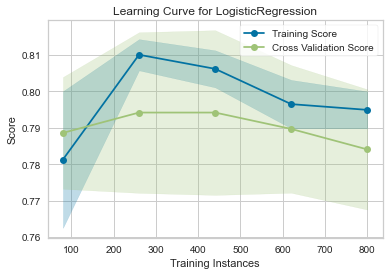

In [867]:
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(LogisticRegression(), cv=10)
lc3_viz.fit(X_train, y_train)
_ = lc3_viz.poof()

The learning curve shows us the level of learning the algorithm depending on experience.

Learning curve can be used for diagnose if model is underfit, overfit or well-fit model.

Traning Score gives us information on how well the model learns

Cross Validation Score get us a proper estimate of the generalization

A plot of learning curves shows underfitting if validation line stays flat or decrease 

**Classification True vs False and Positive vs Negative**

In [878]:
import matplotlib.pyplot as plt

def c_matrix(matrix, title):
    fig, ax = plt.subplots(1,1)
    im1 = plt.imshow(matrix, cmap='Greens')
    fig.colorbar(im1)

    for i in range(2):
        for j in range(2):
            text = ax.text(j, i,matrix[i, j],
                           ha="center", va="center", color="black")

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'Confusion Matrix\n{title}')
    plt.show()

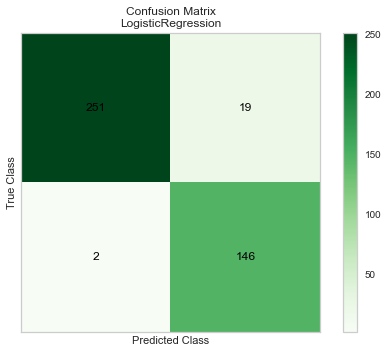

In [879]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_regression.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
c_matrix(matrix, "LogisticRegression")

## Random Forest Classifier

In [871]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest = random_forest.fit(X_train, y_train)
score = random_forest.score(X_test, y_test)
models["random_forest"] = score
score

0.8708133971291866

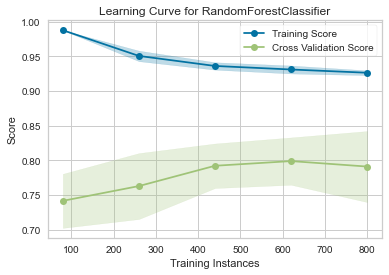

In [868]:
from yellowbrick.model_selection import LearningCurve
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve( RandomForestClassifier(n_estimators=100, random_state=42), cv=10)
lc3_viz.fit(X_train, y_train)
_ = lc3_viz.poof()

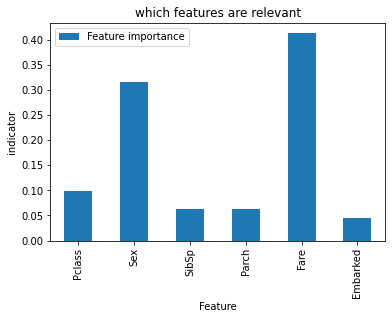

In [791]:
import matplotlib.pyplot as plt
data = random_forest.feature_importances_
column_names = X_train.columns.values
df1 = pd.DataFrame(index=column_names, data=data, columns=["feature importance"])
df1.plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel('indicator')
plt.title('which features are relevant')
plt.show()

We want the greatest possible values to be diagonally and the rest as small as possible.

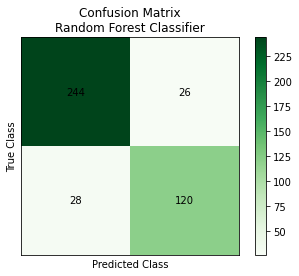

In [836]:
y_pred = random_forest.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
c_matrix(matrix, "Random Forest Classifier")

## Decision Tree Classifier

In [873]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree =decision_tree.fit(X_train, y_train)
score = decision_tree.score(X_test, y_test)
models["decision_tree"] = score
score

0.9258373205741627

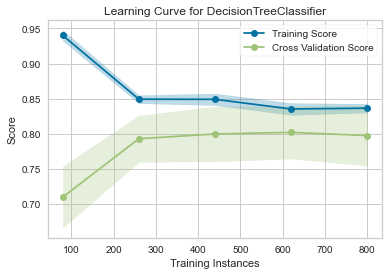

In [865]:
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(DecisionTreeClassifier(random_state=42, max_depth=5), cv=10)
lc3_viz.fit(X_train, y_train)
_ = lc3_viz.poof()

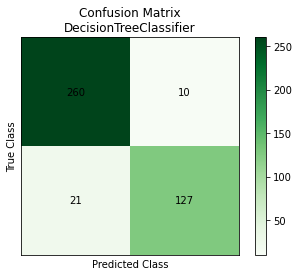

In [841]:
y_pred = decision_tree.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
c_matrix(matrix, "DecisionTreeClassifier")

## Support Vector Machine

In [874]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc = svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
models["svc"] = score
score

0.6650717703349283

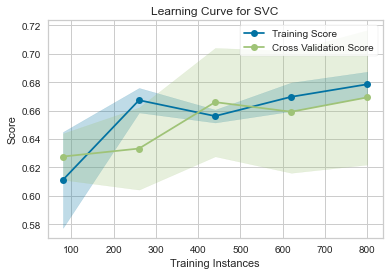

In [863]:
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(SVC(random_state=42, probability=True), cv=10)
lc3_viz.fit(X_train, y_train)
_ = lc3_viz.poof()

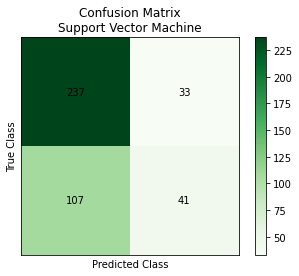

In [847]:
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
c_matrix(matrix, "Support Vector Machine")

## K-Nearest Neighbor

In [875]:
from sklearn.neighbors import KNeighborsClassifier
k_neigth = KNeighborsClassifier()
k_neigth = k_neigth.fit(X_train, y_train)
score = k_neigth.score(X_test, y_test)
models["k_neigth"] = score
score

0.7894736842105263

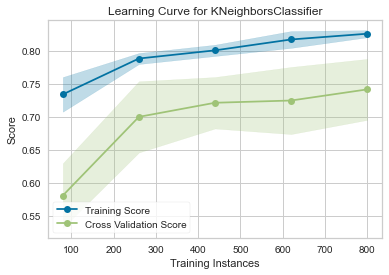

In [864]:
fig, ax = plt.subplots(figsize=(6, 4))
lc3_viz = LearningCurve(KNeighborsClassifier(), cv=10)
lc3_viz.fit(X_train, y_train)
_ = lc3_viz.poof()

Despite the not very high score, it seems that with the increase of training data, the model learns faster and faster

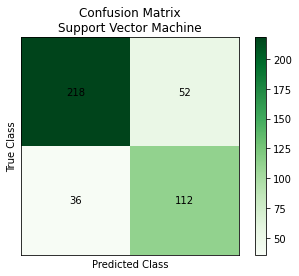

In [849]:
y_pred = k_neigth.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
c_matrix(matrix, "Support Vector Machine")

# Summary

In [887]:
dict(sorted(models.items(), key=lambda x: x[1], reverse=True))

{'logistic_regression': 0.9497607655502392,
 'decision_tree': 0.9258373205741627,
 'random_forest': 0.8708133971291866,
 'k_neigth': 0.7894736842105263,
 'svc': 0.6650717703349283}

Drawing the conclusion from my data, you can distinguish here the logistic regression that obtained the highest score

In [897]:
y_pred = logistic_regression.predict(X_test)

In [901]:
submission = pd.DataFrame({
    "PassengerId" : PassengerId.values,
    "Survived" : y_pred
})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [902]:
submission.to_csv('submission.csv', index = False)